<a href="https://colab.research.google.com/github/pri2k/Data-Mining-Lab/blob/main/Titanic%20Dataset%20Part%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
titanic = sns.load_dataset('titanic')

print("Dataset Shape:", titanic.shape, "\n")

print("First 5 rows:")
print(titanic.head(), "\n")

Dataset Shape: (891, 15) 

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True   



In [4]:
print("Data Info:")
print(titanic.info(), "\n")

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None 



In [5]:
print("Summary Statistics:")
print(titanic.describe(include='all'), "\n")

Summary Statistics:
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_tow

In [6]:
print("Missing values per column:")
print(titanic.isnull().sum(), "\n")

Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64 



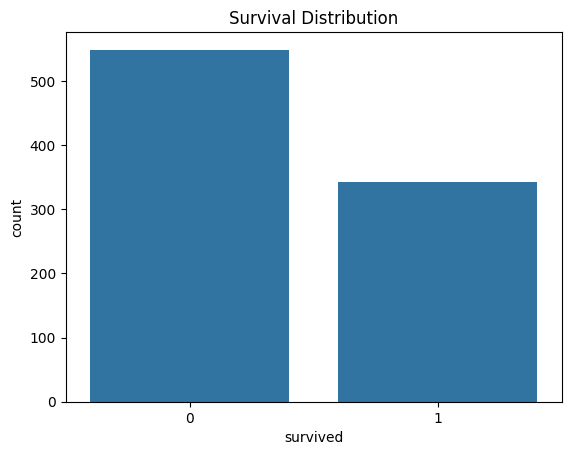

In [7]:
sns.countplot(data=titanic, x='survived')
plt.title("Survival Distribution")
plt.show()

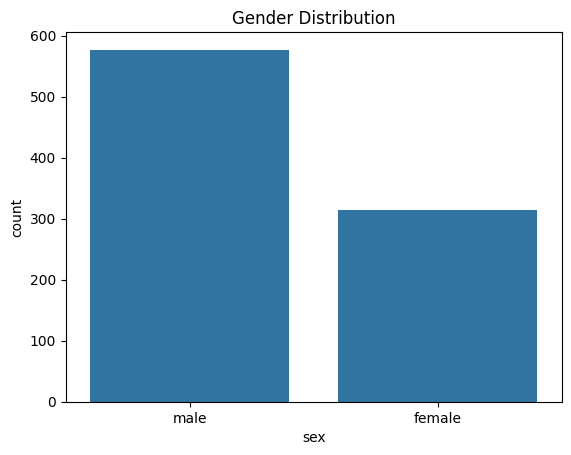

In [8]:
sns.countplot(data=titanic, x='sex')
plt.title("Gender Distribution")
plt.show()

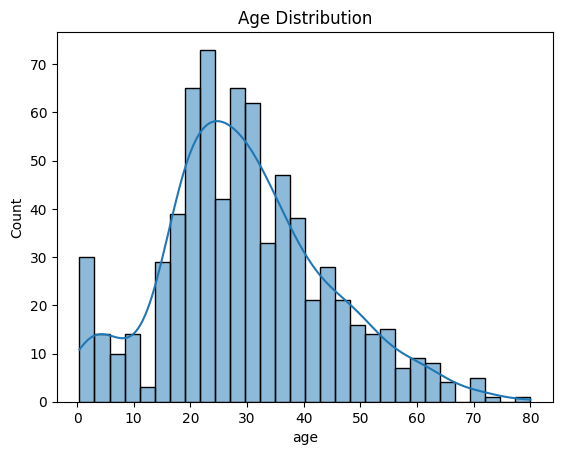

In [9]:
sns.histplot(titanic['age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

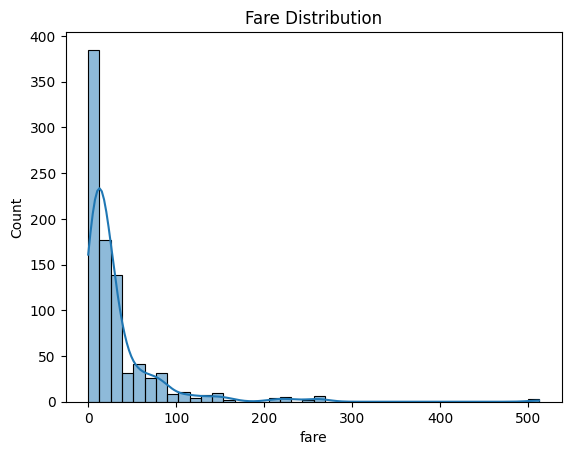

In [10]:
sns.histplot(titanic['fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()

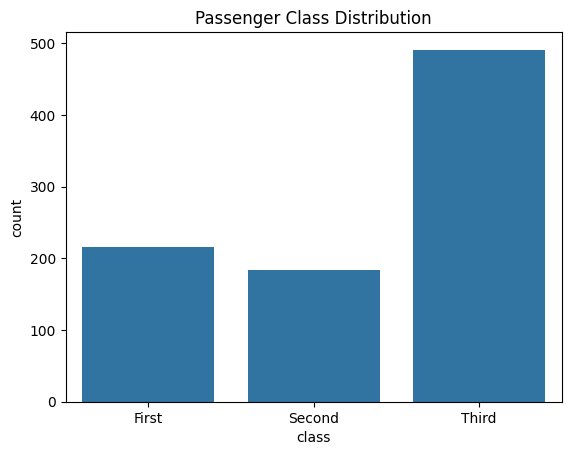

In [11]:
sns.countplot(data=titanic, x='class')
plt.title("Passenger Class Distribution")
plt.show()

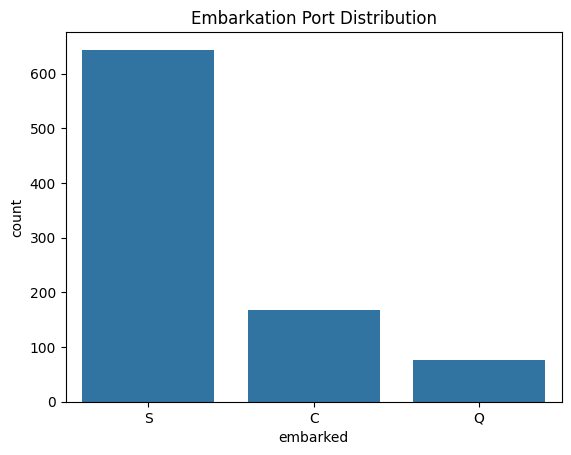

In [12]:
sns.countplot(data=titanic, x='embarked')
plt.title("Embarkation Port Distribution")
plt.show()

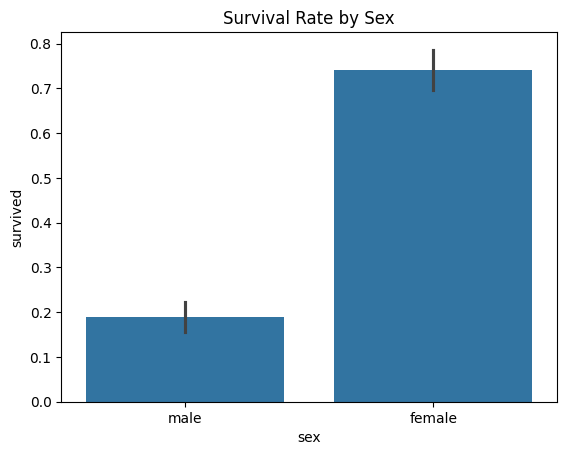

In [13]:
sns.barplot(data=titanic, x='sex', y='survived')
plt.title("Survival Rate by Sex")
plt.show()

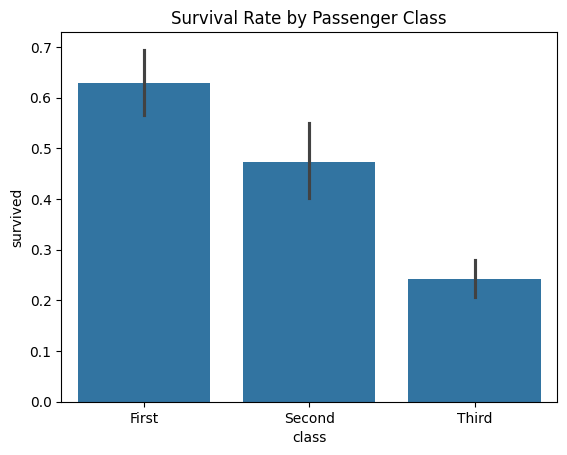

In [14]:
sns.barplot(data=titanic, x='class', y='survived')
plt.title("Survival Rate by Passenger Class")
plt.show()

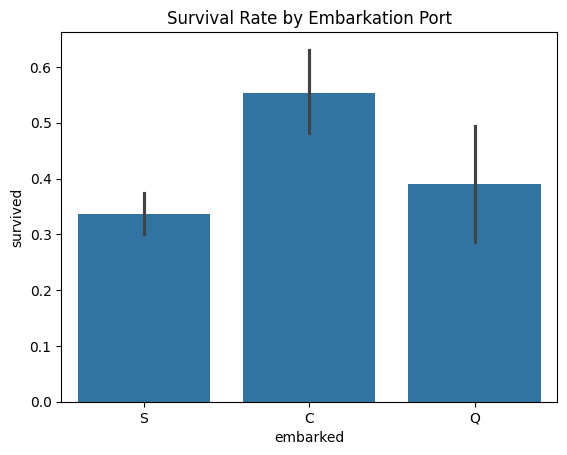

In [15]:
sns.barplot(data=titanic, x='embarked', y='survived')
plt.title("Survival Rate by Embarkation Port")
plt.show()

In [15]:
sns.boxplot(data=titanic, x='survived', y='age')
plt.title("Age Distribution by Survival")
plt.show()

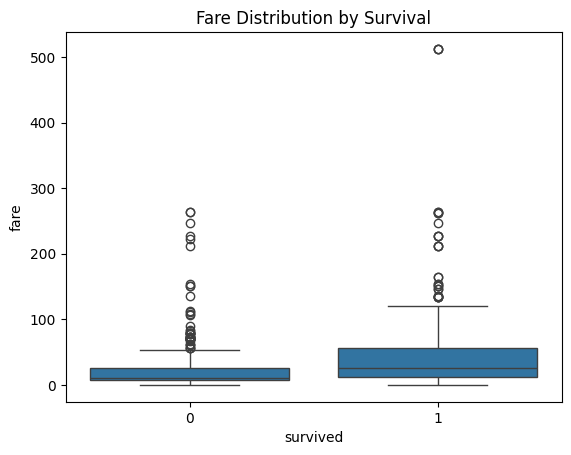

In [16]:
sns.boxplot(data=titanic, x='survived', y='fare')
plt.title("Fare Distribution by Survival")
plt.show()

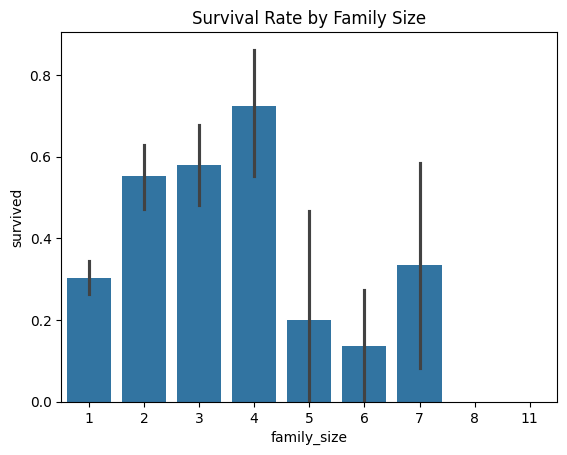

In [17]:
#Family Size = sibsp + parch + self
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

sns.barplot(data=titanic, x='family_size', y='survived')
plt.title("Survival Rate by Family Size")
plt.show()

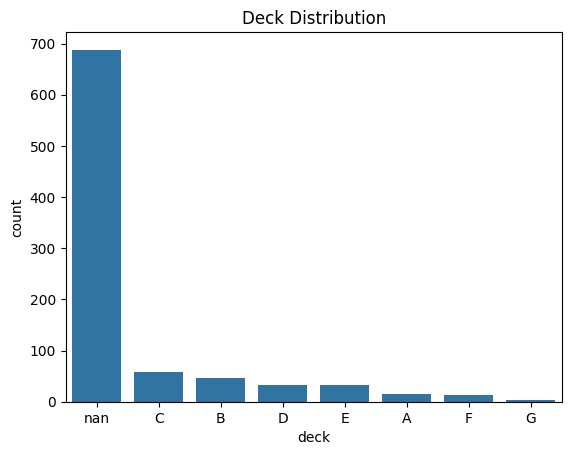

In [18]:
titanic['deck'] = titanic['deck'].astype(str)
sns.countplot(data=titanic, x='deck', order=titanic['deck'].value_counts().index)
plt.title("Deck Distribution")
plt.show()

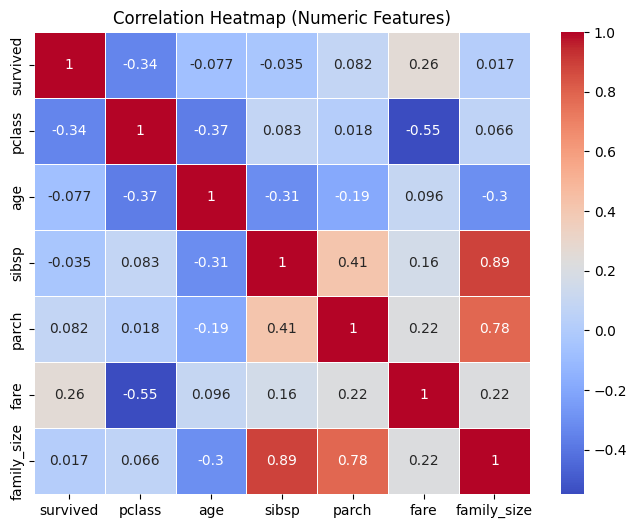

In [19]:
numeric_data = titanic.select_dtypes(include=['float64','int64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

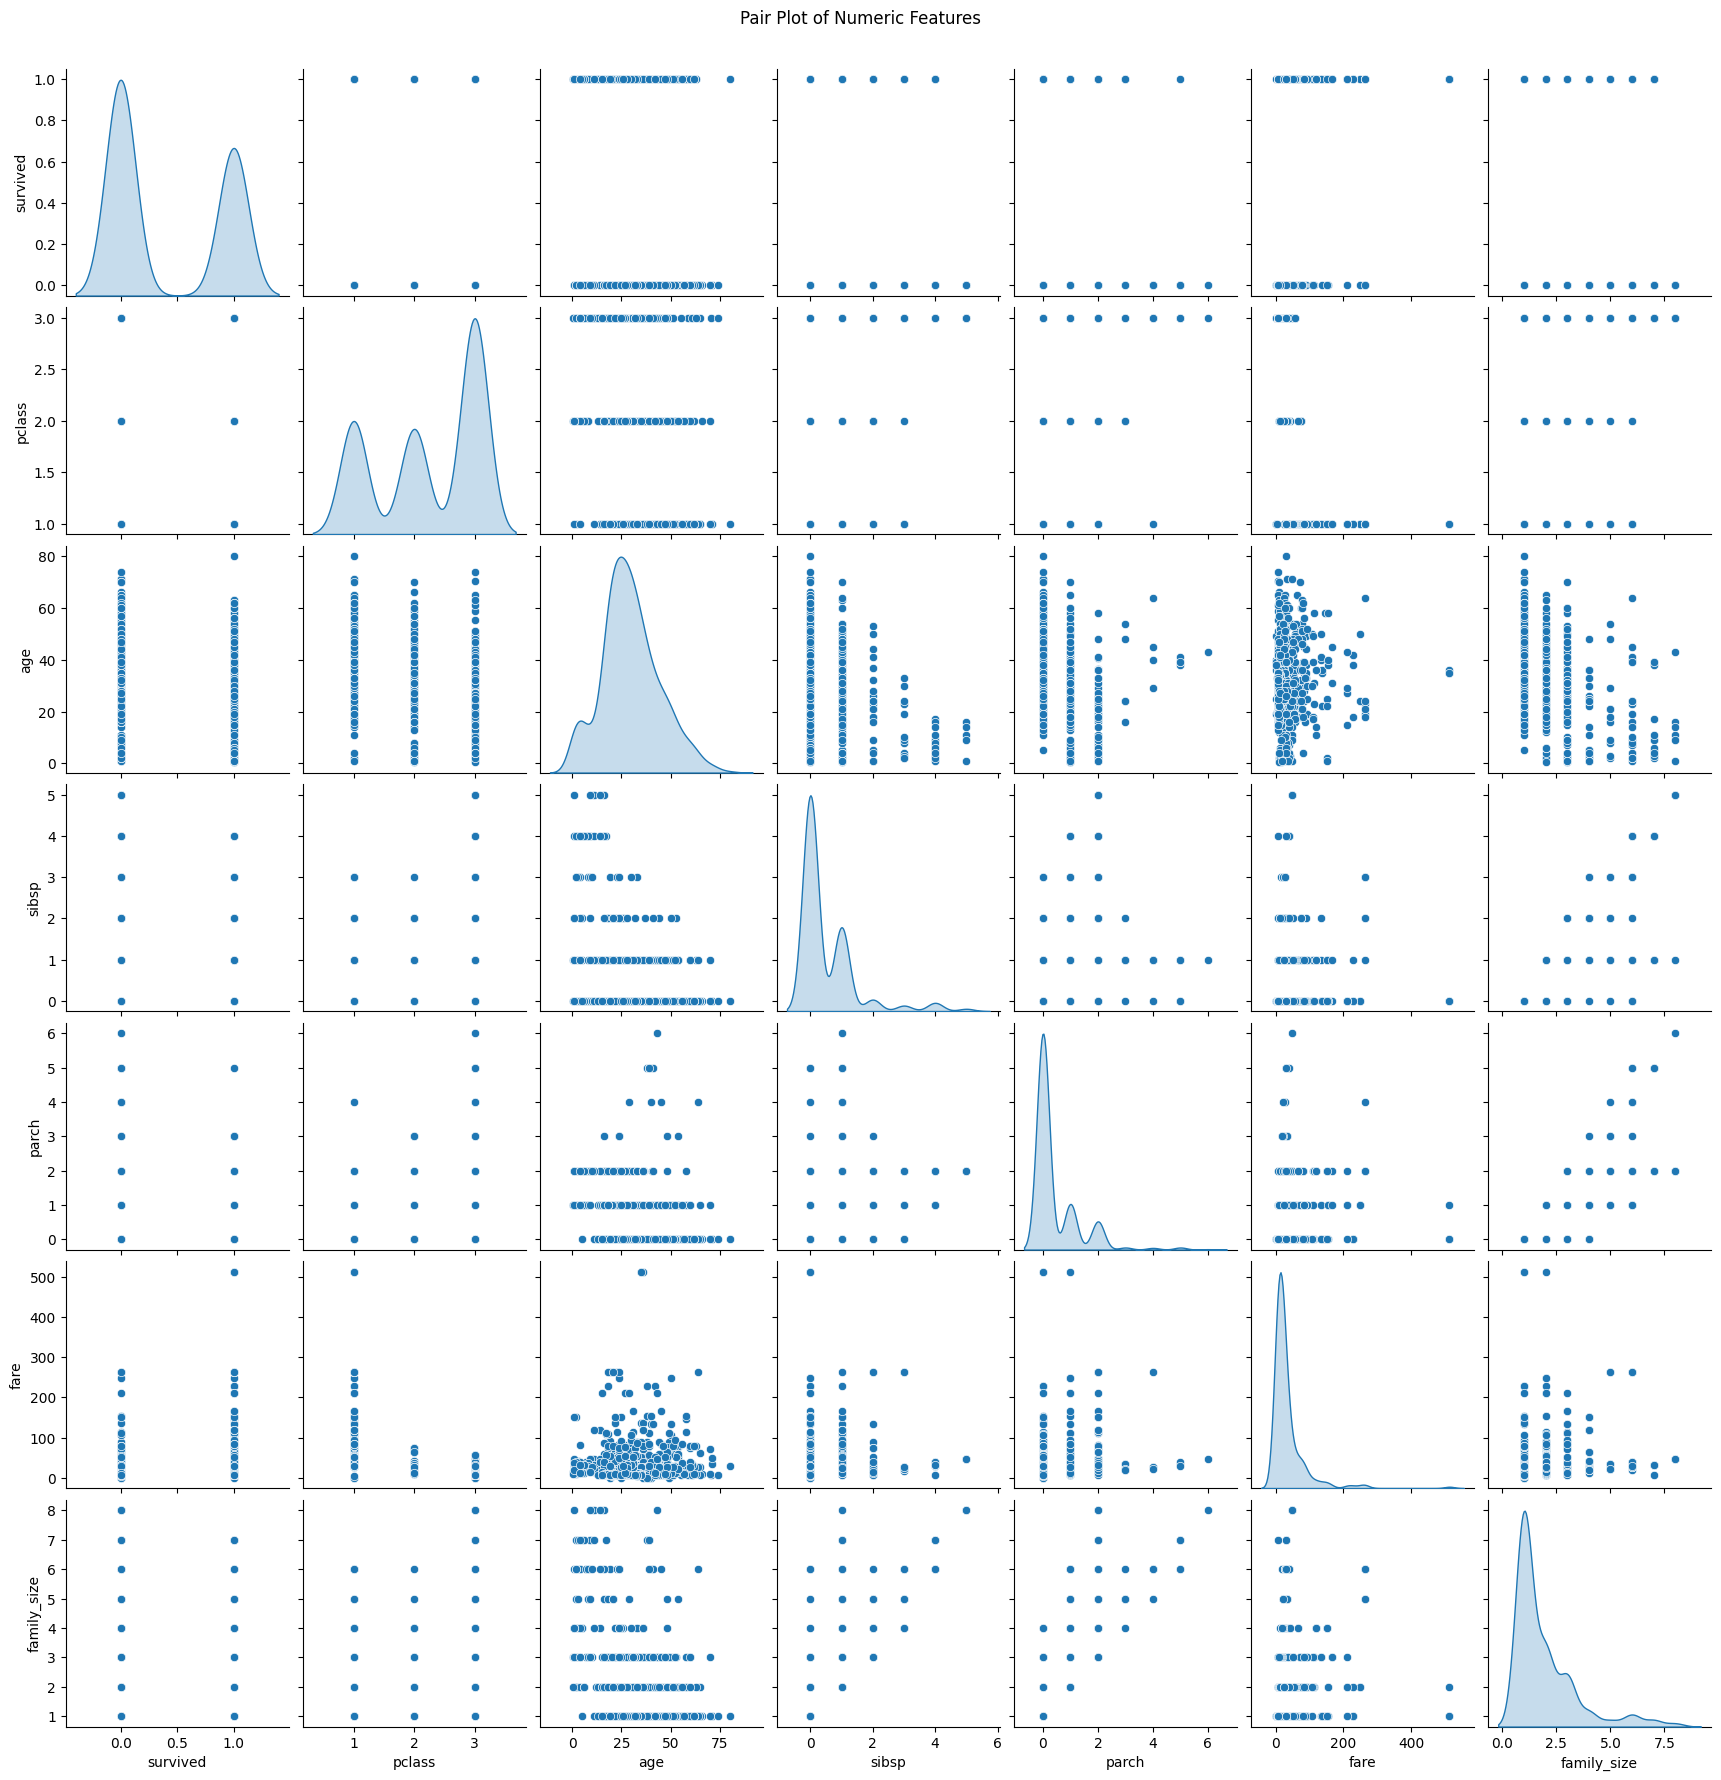

In [20]:
sns.pairplot(numeric_data.dropna(), diag_kind='kde')
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

In [21]:
print("Survival by Class and Sex:")
print(pd.crosstab(titanic['class'], titanic['sex'], margins=True), "\n")

print("Survival by Embarked Port and Sex:")
print(pd.crosstab(titanic['embarked'], titanic['sex'], margins=True), "\n")


Survival by Class and Sex:
sex     female  male  All
class                    
First       94   122  216
Second      76   108  184
Third      144   347  491
All        314   577  891 

Survival by Embarked Port and Sex:
sex       female  male  All
embarked                   
C             73    95  168
Q             36    41   77
S            203   441  644
All          312   577  889 



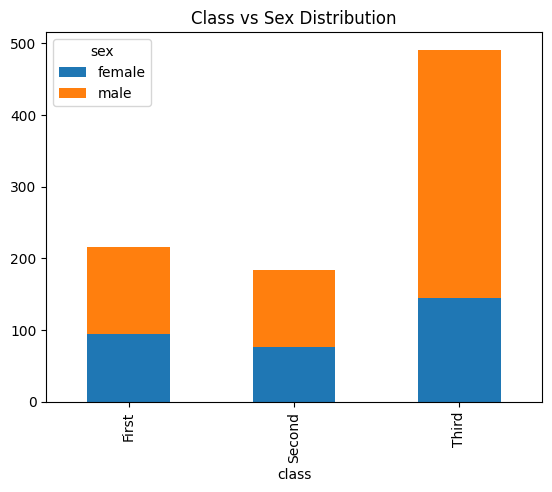

In [22]:
crosstab = pd.crosstab(titanic['class'], titanic['sex'])
crosstab.plot(kind='bar', stacked=True)
plt.title("Class vs Sex Distribution")
plt.show()

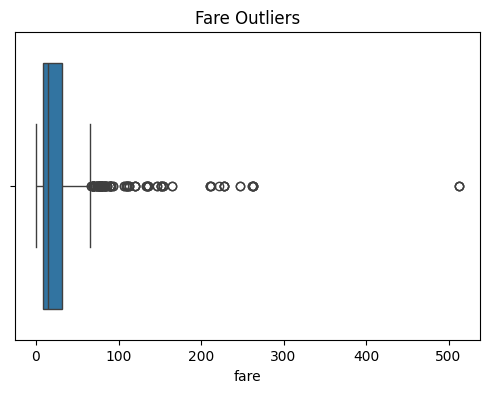

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x=titanic['fare'])
plt.title("Fare Outliers")
plt.show()

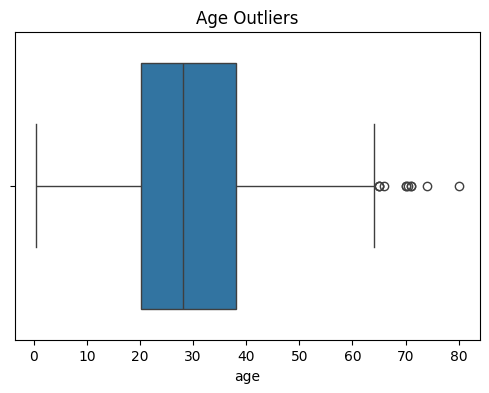

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=titanic['age'])
plt.title("Age Outliers")
plt.show()

In [25]:
# 1. More passengers died than survived.
# 2. Females had a significantly higher survival rate.
# 3. Higher-class passengers had better survival chances.
# 4. Children and young passengers had slightly better chances.
# 5. Fare positively influenced survival (wealthier passengers survived more).
# 6. Family size of 2-4 had better survival compared to being alone or large families.
# 7. Correlation shows survival positively linked with fare & class, weak with age.
# 8. Outliers exist in Fare (very high fares for few passengers).
# 9. Deck data shows most passengers from lower decks, survival varied by deck.